# Terrain Classification - Combined User Data
### Created by Keenan McConkey 2019.08.01

In [1]:
from __future__ import absolute_import, division, print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pymrmr
import sklearn

## Part 1 - Importing Preprocessed Data

### Part (a) - Functions for Data Import

In [28]:
# All the terrains, placements, vectors, power-assistance, users in the study
terrains = ['Concrete', 'Carpet', 'Linoleum', 'Asphalt', 'Sidewalk', 'Grass', 'Gravel']
powers = ['Manual'] # TODO: Fix power PSD data and add back in
placements_manual = ['Middle', 'Left', 'Right', 'Synthesis']
placements_power = ['Middle']
vectors = ['TimeFeats', 'FreqFeats', 'FFTs', 'PSDLogs']
users = ['All']
axes = ['X Accel', 'Y Accel', 'Z Accel', 'X Gyro', 'Y Gyro', 'Z Gyro']

In [3]:
'''Get the integer terrain value of a given label'''
def get_terrain_num(_label):
    for i, terrain in enumerate(terrains):
        if terrain in _label:
            return i
        
    raise Exception('Unknown terrain')

'''Get the name associated with a terrain integer'''
def get_terrain_name(terrain_num):
    return terrains[terrain_num]
    return terrains[terrain_num]

'''Get the placement location name for given label'''
def get_placement(_label):
    for placement in placements:
        if placement in _label:
            return placement
    
    raise Exception('Unknown placement')

'''Get the transform used for given label'''
def get_transform(_label):
    for transform in transforms:
        if transform in _label:
            return transform
    
    raise Exception('Unknown transform')

### Part (b) - Import Processed Data from Each User

In [4]:
'''Combine data from labelled datasets into a single dataframe'''
def combine_datasets(datasets):
    return pd.concat(list(datasets.values()), ignore_index=True, sort=False)

In [5]:
path = 'processed_data/new_setup/new_columning/' 

# Nested dictionary of processed data:
# - Power assistance type
# -- Placement
# --- Feature Vector
# ---- User
power_dict = {}

# Create each nesting of the dictionary
for power in powers:
    placement_dict = {}
    
    # Power datasets only have middle placement (for now)
    if power == 'Power':
        placements = placements_power.copy()
    else:
        placements = placements_manual.copy()
    
    for placement in placements:
        vector_dict = {}

        for vector in vectors:
            user_dict = {}

            for user in users:
                # File name based on above parameters
                filename = power.lower() + '/' + placement + '_' + vector + '_' + user 
                if power == 'Power':
                    filename += '_Power'
                filename += '.csv'
                
                # Read data and update current user dictionary
                data = pd.read_csv(path + filename)
                user_dict.update({user: data})

            # Combine users to form a new entry of user dictionary, save to .csv
            # NaNs arise when you combine Synthesis feature vectors
            #combined_data = combine_datasets(user_dict).dropna(axis='columns')
            #user_dict.update({'All': combined_data})

            vector_dict.update({vector: user_dict})
        
        # Create a dictionary of the combined feature vector for each user
        combined_vector_user_dict = {}
        
        for user in user_dict.keys():
            # Get all vectors for current user and pop label column
            user_all_vectors = []
            
            for vector in vector_dict.values():
                user_vector = vector[user].copy()
                labels = user_vector.pop('Label') # All label columns should be the same
                user_all_vectors.append(user_vector)
            
            # Combine vectors and add back label column
            combined_vector = pd.concat(user_all_vectors, axis='columns')
            combined_vector.insert(loc=0, column='Label', value=labels)
            combined_vector_user_dict.update({user: combined_vector})
        
        # Add the combined feature vector to the vector dictionary
        vector_dict.update({'Combined': combined_vector_user_dict})
        
        placement_dict.update({placement: vector_dict})
    
    power_dict.update({power: placement_dict})

In [29]:
# Update vectors to reflect new combined vector
vectors.append('Combined')

In [7]:
# Check some data
power_dict['Manual']['Middle']['Combined']['All'].tail()

,Label,Mean X Accel Middle,Std X Accel Middle,Norm X Accel Middle,AC X Accel Middle,Max X Accel Middle,Min X Accel Middle,RMS X Accel Middle,ZCR X Accel Middle,Skew X Accel Middle,...,PSDLog 50 Hz Z Gyro Middle,PSDLog 51 Hz Z Gyro Middle,PSDLog 52 Hz Z Gyro Middle,PSDLog 53 Hz Z Gyro Middle,PSDLog 54 Hz Z Gyro Middle,PSDLog 55 Hz Z Gyro Middle,PSDLog 56 Hz Z Gyro Middle,PSDLog 57 Hz Z Gyro Middle,PSDLog 58 Hz Z Gyro Middle,PSDLog 59 Hz Z Gyro Middle
16065,4,-2.993490,0.058487,0.409874,0.094989,-0.334863,-0.373391,0.409337,0.086221,0.142740,...,0.675446,0.980595,1.012408,0.896429,1.043201,0.868404,1.153671,1.019332,1.010432,0.885506
16066,4,-5.150751,-0.420820,0.824175,0.433643,-0.860113,-0.373391,0.823611,-1.417281,-0.250344,...,1.898609,1.801497,1.839670,1.786389,1.775234,1.902943,1.784176,1.816177,1.817222,1.786705
16067,4,-2.704405,-0.045126,0.249784,-0.019371,-0.793978,-0.047606,0.249256,-0.414946,-0.222345,...,0.912860,0.935080,1.081082,1.002101,0.969530,1.040619,1.045307,1.018618,0.919208,0.989472
16068,4,2.020397,-0.459843,-0.191738,-0.287109,-0.497873,0.697808,-0.192238,-0.359261,-0.638358,...,1.552285,1.499390,1.544513,1.482069,1.469938,1.493814,1.545534,1.521183,1.503133,1.538029
16069,4,2.414125,0.033483,0.312220,0.024136,-0.173717,0.378144,0.311688,-0.971799,-0.985338,...,1.394192,1.466845,1.494007,1.416393,1.453440,1.400857,1.398331,1.511435,1.459463,1.516934


## Part 2 -  mRMR (minimum Redunancy Maximum Relevance)

mRMR tries to find which features have the highest information shared with classified state and lowest information shared with other features.

### Part (a) - Middle Frame Placement

#### Part (i) - Manual Wheelchair

In [8]:
pymrmr.mRMR(data=power_dict['Manual']['Middle']['TimeFeats']['All'], method='MID', nfeats=5)

['ZCR Y Gyro Middle',
 'ZCR Y Accel Middle',
 'ZCR Z Accel Middle',
 'ZCR X Accel Middle',
 'Std Y Accel Middle']

In [9]:
pymrmr.mRMR(data=power_dict['Manual']['Middle']['FreqFeats']['All'], method='MID', nfeats=5)

['FC Y Gyro Middle',
 'FC Y Accel Middle',
 'VF Z Accel Middle',
 'FC X Gyro Middle',
 'VF Y Gyro Middle']

In [10]:
pymrmr.mRMR(data=power_dict['Manual']['Middle']['FFTs']['All'], method='MID', nfeats=5)

['FFT 14 Hz Y Accel Middle',
 'FFT 1 Hz Y Gyro Middle',
 'FFT 2 Hz X Gyro Middle',
 'FFT 17 Hz Z Accel Middle',
 'FFT 21 Hz Y Accel Middle']

In [11]:
pymrmr.mRMR(data=power_dict['Manual']['Middle']['PSDLogs']['All'], method='MID', nfeats=5)

['PSDLog 33 Hz Y Gyro Middle',
 'PSDLog 0 Hz Y Gyro Middle',
 'PSDLog 56 Hz Y Accel Middle',
 'PSDLog 1 Hz X Gyro Middle',
 'PSDLog 59 Hz Y Accel Middle']

In [12]:
pymrmr.mRMR(data=power_dict['Manual']['Middle']['Combined']['All'], method='MID', nfeats=5)

['FC Y Gyro Middle',
 'PSDLog 12 Hz Z Accel Middle',
 'VF X Gyro Middle',
 'ZCR Z Accel Middle',
 'ZCR Y Accel Middle']

#### Part (i) - Power Assist Wheelchair

In [13]:
#pymrmr.mRMR(data=power_dict['Power']['Middle']['Features']['All'], method='MID', nfeats=5)

In [14]:
#pymrmr.mRMR(data=power_dict['Power']['Middle']['FFTs']['All'], method='MID', nfeats=5)

In [15]:
#pymrmr.mRMR(data=power_dict['Power']['Middle']['PSDLogs']['All'], method='MID', nfeats=5)

In [16]:
#pymrmr.mRMR(data=power_dict['Power']['Middle']['Combined']['All'], method='MID', nfeats=5)

### Part (b) - Left Wheel Placement

In [17]:
pymrmr.mRMR(data=power_dict['Manual']['Left']['TimeFeats']['All'], method='MID', nfeats=5)

['Std Z Accel Left',
 'ZCR Z Accel Left',
 'Min Z Gyro Left',
 'ZCR Y Accel Left',
 'ZCR Y Gyro Left']

In [18]:
pymrmr.mRMR(data=power_dict['Manual']['Left']['FreqFeats']['All'], method='MID', nfeats=5)

['FC Z Accel Left',
 'RVF Y Accel Left',
 'FC X Accel Left',
 'FC Y Accel Left',
 'RVF Z Accel Left']

In [19]:
pymrmr.mRMR(data=power_dict['Manual']['Left']['FFTs']['All'], method='MID', nfeats=5)

['FFT 20 Hz Z Accel Left',
 'FFT 43 Hz Z Accel Left',
 'FFT 14 Hz Z Accel Left',
 'FFT 63 Hz Z Accel Left',
 'FFT 38 Hz Z Accel Left']

In [20]:
pymrmr.mRMR(data=power_dict['Manual']['Left']['PSDLogs']['All'], method='MID', nfeats=5)

['PSDLog 27 Hz Z Accel Left',
 'PSDLog 62 Hz Z Accel Left',
 'PSDLog 17 Hz Z Accel Left',
 'PSDLog 40 Hz Z Accel Left',
 'PSDLog 48 Hz X Accel Left']

In [21]:
pymrmr.mRMR(data=power_dict['Manual']['Left']['Combined']['All'], method='MID', nfeats=5)

['PSDLog 27 Hz Z Accel Left',
 'FC Z Accel Left',
 'PSDLog 17 Hz Z Accel Left',
 'PSDLog 63 Hz Z Accel Left',
 'PSDLog 48 Hz X Accel Left']

### Part (c) - Right Wheel Placement

In [22]:
pymrmr.mRMR(data=power_dict['Manual']['Right']['TimeFeats']['All'], method='MID', nfeats=5)

['ZCR Z Accel Right',
 'RMS Z Accel Right',
 'Max Z Gyro Right',
 'ZCR Y Gyro Right',
 'Max Z Accel Right']

In [23]:
pymrmr.mRMR(data=power_dict['Manual']['Right']['FreqFeats']['All'], method='MID', nfeats=5)

['VF Z Accel Right',
 'RVF X Accel Right',
 'FC Y Accel Right',
 'RVF Z Accel Right',
 'FC X Accel Right']

In [24]:
pymrmr.mRMR(data=power_dict['Manual']['Right']['FFTs']['All'], method='MID', nfeats=5)

['FFT 24 Hz Z Accel Right',
 'FFT 63 Hz Z Accel Right',
 'FFT 18 Hz Z Accel Right',
 'FFT 14 Hz Z Accel Right',
 'FFT 53 Hz Z Accel Right']

In [25]:
pymrmr.mRMR(data=power_dict['Manual']['Right']['PSDLogs']['All'], method='MID', nfeats=5)

['PSDLog 62 Hz Z Accel Right',
 'PSDLog 15 Hz Z Accel Right',
 'PSDLog 55 Hz Z Accel Right',
 'PSDLog 25 Hz Z Accel Right',
 'PSDLog 63 Hz Z Accel Right']

In [30]:
pymrmr.mRMR(data=power_dict['Manual']['Right']['Combined']['All'], method='MID', nfeats=5)

['ZCR Z Accel Right',
 'PSDLog 16 Hz Z Accel Right',
 'VF Z Accel Right',
 'PSDLog 26 Hz Z Accel Right',
 'PSDLog 62 Hz Z Accel Right']

### Part (d) - Synthesis "Placement"

In [31]:
#pymrmr.mRMR(data=power_dict['Manual']['Synthesis']['TimeFeats']['All'], method='MID', nfeats=5)

In [32]:
#pymrmr.mRMR(data=power_dict['Manual']['Synthesis']['FreqFeats']['All'], method='MID', nfeats=5)

In [33]:
#pymrmr.mRMR(data=power_dict['Manual']['Synthesis']['FFTs']['All'], method='MID', nfeats=5)

In [34]:
#pymrmr.mRMR(data=power_dict['Manual']['Synthesis']['PSDLogs']['All'], method='MID', nfeats=5)

In [35]:
#pymrmr.mRMR(data=power_dict['Manual']['Synthesis']['Combined']['All'], method='MID', nfeats=5)

### Part (e) - Nested Dictionary of Top Features

In [36]:
# Create dictionary of top mRMR features to speed up calculations, up to to 10
power_dict_features = {}

for power in powers:
    placement_dict_features = {}
    
    for placement in placements:
        vector_dict_features = {}
        
        for vector in vectors:
            user_dict_features = {}

            # Only calculate for all users for now
            for user in ['All']:
                top_features = pymrmr.mRMR(data=power_dict[power][placement][vector][user],
                                           method='MID', nfeats=10)
                user_dict_features.update({user: top_features})

            vector_dict_features.update({vector: user_dict_features})
            
        placement_dict_features.update({placement: vector_dict_features})
    
    power_dict_features.update({power: placement_dict_features})

ValueError: cannot convert float NaN to integer

In [37]:
# Pickle the dictionary
import pickle

mRMR_dict_filename = '/home/caris/Wheelchair-Terrain-Classification/dicts/mRMR_Top10_Dictionary.pkl'
outfile = open(mRMR_dict_filename, 'wb')
pickle.dump(power_dict_features, outfile)
outfile.close()

In [ ]:
# Unpickle the dictionary
#infile = open(mRMR_dict_filename, 'rb')
#power_dict_features = pickle.load(infile)
#infile.close()

## Part 3 - PCA (Principal Component Analysis)

In [38]:
from sklearn.decomposition import PCA

def get_pca_df(combined_data, n_components=2):
    # Setup PCA parameters
    pca = PCA(n_components=n_components)
    
    # Copy data to avoid modification
    data = combined_data.copy()
    
    # Extract terrain labels
    labels = data.pop('Label')
    
    # Get specified number of principal components and convert to dataframe
    pc = pca.fit_transform(data)
    pc_df = pd.DataFrame(data=pc, columns=['PC {}'.format(i + 1) for i in range(n_components)])
    
    #print('Explained Variance of Each PC: {}'.format(pca.explained_variance_ratio_))
    #print('Total Explained Variance: {}'.format(np.sum(pca.explained_variance_ratio_)))
    
    return pd.concat([labels, pc_df], axis='columns')

In [39]:
get_pca_df(power_dict['Manual']['Synthesis']['Combined']['All']).tail()

,Label,PC 1,PC 2
13270,2.0,7.962545,27.160344
13271,2.0,-14.349221,21.304082
13272,2.0,-27.441439,33.800137
13273,2.0,-57.477982,15.158918
13274,2.0,-66.795324,-0.429251


In [40]:
get_pca_df(power_dict['Manual']['Synthesis']['Combined']['All'], n_components=5).tail()

,Label,PC 1,PC 2,PC 3,PC 4,PC 5
13270,2.0,7.962545,27.160341,-1.746825,24.987244,10.147862
13271,2.0,-14.349221,21.304085,22.952698,5.220102,1.831698
13272,2.0,-27.441439,33.800137,32.664014,-12.381744,2.040796
13273,2.0,-57.477982,15.158918,37.925960,-6.076243,0.351659
13274,2.0,-66.795324,-0.429252,37.974747,-6.859912,2.290404


In [41]:
def visualize_2d_pca(pca_2d_df, figsize=(8, 8)):
    # Plot parameters
    plt.clf()
    plt.figure(figsize=figsize)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    # Scatter plot of each terrain
    for terrain in terrains:
        terrain_indices = pca_2d_df['Label'] == get_terrain_num(terrain)
        plt.scatter(pca_2d_df.loc[terrain_indices, 'PC 1'], pca_2d_df.loc[terrain_indices, 'PC 2'])
    
    plt.legend(terrains)
    plt.show()

<Figure size 432x288 with 0 Axes>

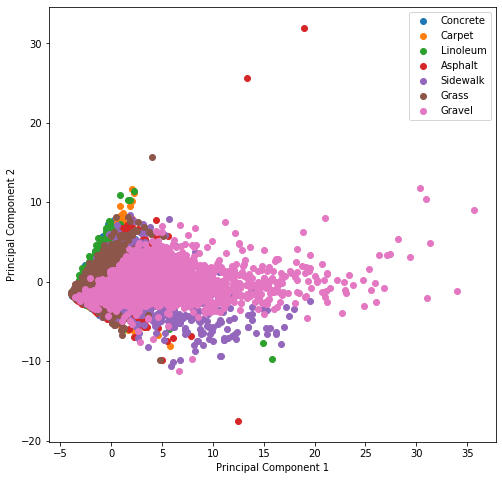

In [46]:
visualize_2d_pca(get_pca_df(power_dict['Manual']['Right']['FreqFeats']['All']))

## Part 4 - Comparing Classifier Accuracy

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Dictionary of classifiers
classifiers = {'Naive Bayes': GaussianNB(),
               'k Nearest': KNeighborsClassifier(),
               'Decision Tree': DecisionTreeClassifier(), 
               'Random Forest': RandomForestClassifier(n_estimators=100),
               'AdaBoost': AdaBoostClassifier(),
               'Support Vector Machine': SVC(gamma='scale')}

In [43]:
from sklearn.model_selection import KFold

'''Run train test k-fold times
   Returns an tuple of arrays, where arrays elements are actual/predicted labels 
   for each k-fold test'''
def train_test_k_fold(combined_data, n_splits, model):
    # Shuffle ensures we get a mix of terrains
    kf = KFold(n_splits=n_splits, shuffle=True)

    # Copy data to avoid modification - Testing removing this
    data = combined_data
    
    # Extract terrain labels
    labels = data.pop('Label')

    # Array of predicted labels for each k fold
    test_k_fold = []
    predict_k_fold = []

    # Split into n splits
    for train_index, test_index in kf.split(data):
        train, test = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        
        # Actual labels
        test_k_fold.append(test_labels)
        
        # Train and test model
        model.fit(train, train_labels)
        predict_k_fold.append(model.predict(test))
    
    # Put back terrain labels
    data.insert(0, 'Label', labels)
    
    return (test_k_fold, predict_k_fold)

In [52]:
'''Train a model on all the given test data and return it'''
def train_model_on_all(combined_data, model):
    # Copy data to avoid modification - Testing removing this
    data = combined_data
    labels = data.pop('Label')
    
    # Train the model
    model.fit(data, labels)
    
    # Return the labels to original position
    data.insert(0, 'Label', labels)
    
    # Return trained model
    return model

In [56]:
'''Create a table of accuracies and associated trained models for each feature vector and classifier'''
def create_accuracy_table(n_splits, power_type='Manual', user_name='All', separate_axes=False,
                          feat_selection='None', n_feats=None, verbose=False):
    
    # Power type affects which placements are available
    if power_type == 'Manual':
        placements = placements_manual
    else:
        placements = placements_power
    
    # Dataframe table of accuracies for each classifier for each placement
    if separate_axes:
        vector_indices = [p + ' ' + v + ' ' + a for p in placements for v in vectors for a in axes]
    else:
        vector_indices = [p + ' ' + v for p in placements for v in vectors]
    
    # Vector column contains each vector for each placement and axes
    accuracy_table = pd.DataFrame({'Vector': vector_indices})
    
    # Nested dictionary of trained models:
    ## Vector type
    ### Classifier name
    model_dict = {vector_index: {} for vector_index in vector_indices}

    # Calculate accuracy for each placement for each feature vector and classifier
    for classifier_name, classifier in classifiers.items():
        model = classifier

        # Row dictionary for given model
        accuracy_rows = {}
        
        # Add current classifier to row dictionary
        for placement in placements:
            for vector in vectors:
                # Extract data for above parameters
                data = power_dict[power_type][placement][vector][user_name].copy()
                
                # Iterate through axes if we want them separate, else just put in empty string
                if separate_axes:
                    itr_axes = axes
                else:
                    itr_axes = ['All']
                
                for axis in itr_axes:
                    index_name = placement + ' ' + vector
                    data_temp = data
                    
                    # If separate axes, get data with only columns matching current axes
                    if separate_axes:
                        index_name += ' ' + axis
                        matching_columns = [column for column in data.columns if axis in column]
                        matching_columns.insert(0, 'Label')
                        data_temp = data_temp[matching_columns]
                    
                    # Use only the top features using mRMR feature selection
                    if feat_selection == 'mRMR':
                        top_feats = power_dict_features[power_type][placement][vector][user_name].copy()
                        top_feats.insert(0, 'Label')
                        data_temp = data_temp[top_feats[:n_feats+1]]

                    # Run PCA on the data
                    elif feat_selection == 'PCA':
                        data_temp = get_pca_df(data_temp, n_components=n_feats)

                    # Extract predicted and actual labels for requested user
                    actual, predict = train_test_k_fold(data_temp, n_splits, model)

                    # Take mean accuracy of k fold testing
                    accuracies = []
                    for i in range(len(predict)):
                        accuracies.append(accuracy_score(actual[i], predict[i]))
                    
                    # Update row dictionary
                    accuracy_rows.update({index_name: np.mean(accuracies)})
                    
                    # Train model on entire feature vector data and return it for pickling
                    trained_model = train_model_on_all(data_temp, model)
                    model_dict[index_name].update({classifier_name: trained_model})
                    
                    if verbose:
                        print('Finished training {} on {} {}'.format(classifier_name, placement, vector))
                    
        # Update accuracy table with classifier column by mapping row names to indices
        accuracy_table[classifier_name] = accuracy_table['Vector'].map(accuracy_rows)
    
    return accuracy_table, model_dict

In [73]:
import pickle
models_path = '/home/caris/Wheelchair-Terrain-Classification/models/'

'''Pickle all the elements of a model dict to individual files'''
def pickle_all_model_dict(model_dict, file_tag=None):
    for feature_type, classifiers in model_dict.items():
        for classifier_name, trained_model in classifiers.items():
            # Get file name from parameters
            model_filename = models_path + classifier_name.replace(' ', '')
            model_filename += '_' + feature_type.replace(' ', '_')
            
            # Add file tag if given
            if file_tag is not None:
                model_filename += '_' + file_tag
            model_filename += '.pkl'
            
            # Pickle the file
            outfile = open(model_filename, 'wb')
            pickle.dump(trained_model, outfile)
            outfile.close()

### Part (a) - Combined Axes Accuracy Table
#### Part (i) - No Feature Selection

In [48]:
# Create accuracy table for 5 k-fold splits without any feature selection
accuracy_table, model_dict = create_accuracy_table(n_splits=5, power_type='Manual', user_name='All')

In [49]:
accuracy_table

,Vector,Naive Bayes,k Nearest,Decision Tree,Random Forest,AdaBoost,Support Vector Machine
0,Middle TimeFeats,0.565215,0.842253,0.789172,0.894275,0.548662,0.883447
1,Middle FreqFeats,0.511201,0.686932,0.643933,0.746484,0.530492,0.697698
2,Middle FFTs,0.516179,0.727878,0.623522,0.781767,0.547729,0.823771
3,Middle PSDLogs,0.552271,0.742315,0.580709,0.745177,0.549907,0.811512
4,Middle Combined,0.557125,0.828376,0.761170,0.875047,0.588799,0.910454
5,Left TimeFeats,0.481079,0.606493,0.614611,0.765348,0.536241,0.742826
6,Left FreqFeats,0.341088,0.515377,0.499486,0.630845,0.475249,0.573282
7,Left FFTs,0.462500,0.457471,0.501886,0.682463,0.521379,0.728249
8,Left PSDLogs,0.458557,0.502058,0.480222,0.660627,0.505373,0.722876
9,Left Combined,0.498913,0.531954,0.607980,0.749114,0.548360,0.778152


In [77]:
accuracy_table_PCA.to_csv('tables/Accuracy_Table.csv', index=False)

#### Part (ii) - mRMR Feature Selection

In [ ]:
# Create accuracy table for 5 k-fold splits with mRMR feature selection
accuracy_table_mRMR, model_dict_mRMR = create_accuracy_table(n_splits=5, 
                                                             power_type='Manual', user_name='All',
                                                             feat_selection='mRMR', n_feats=20, 
                                                             verbose=True)

In [ ]:
accuracy_table_mRMR

In [ ]:
accuracy_table_PCA.to_csv('tables/Accuracy_Table_mRMR.csv', index=False)

#### Part (iii) - PCA Feature Selection

In [50]:
# Create accuracy table for 5 k-fold splits with mRMR feature selection
accuracy_table_PCA, model_dict_PCA = create_accuracy_table(n_splits=5, 
                                                           power_type='Manual', user_name='All',
                                                           feat_selection='PCA', n_feats=20)

In [51]:
accuracy_table_PCA

,Vector,Naive Bayes,k Nearest,Decision Tree,Random Forest,AdaBoost,Support Vector Machine
0,Middle TimeFeats,0.645924,0.819353,0.692968,0.823958,0.552022,0.853267
1,Middle FreqFeats,0.546111,0.683136,0.614997,0.729185,0.528936,0.698009
2,Middle FFTs,0.517486,0.778158,0.664468,0.801618,0.535843,0.768326
3,Middle PSDLogs,0.715121,0.783696,0.670380,0.791226,0.597635,0.795022
4,Middle Combined,0.650653,0.815495,0.711512,0.831425,0.571562,0.826136
5,Left TimeFeats,0.453527,0.578141,0.533154,0.665428,0.462216,0.696124
6,Left FreqFeats,0.349263,0.505544,0.437521,0.569396,0.447297,0.568023
7,Left FFTs,0.483023,0.634103,0.568881,0.710644,0.524009,0.699153
8,Left PSDLogs,0.587344,0.639076,0.548188,0.702355,0.529723,0.714302
9,Left Combined,0.559334,0.648108,0.584200,0.722419,0.536585,0.725277


In [76]:
accuracy_table_PCA.to_csv('tables/Accuracy_Table_PCA.csv', index=False)

In [57]:
# Create accuracy table for 5 k-fold splits with mRMR feature selection
accuracy_table_PCA, model_dict_PCA = create_accuracy_table(n_splits=5, 
                                                           power_type='Manual', user_name='All',
                                                           feat_selection='PCA', n_feats=20)

Finished training Naive Bayes on Middle TimeFeats
Finished training Naive Bayes on Middle FreqFeats
Finished training Naive Bayes on Middle FFTs
Finished training Naive Bayes on Middle PSDLogs
Finished training Naive Bayes on Middle Combined
Finished training Naive Bayes on Left TimeFeats
Finished training Naive Bayes on Left FreqFeats
Finished training Naive Bayes on Left FFTs
Finished training Naive Bayes on Left PSDLogs
Finished training Naive Bayes on Left Combined
Finished training Naive Bayes on Right TimeFeats
Finished training Naive Bayes on Right FreqFeats
Finished training Naive Bayes on Right FFTs
Finished training Naive Bayes on Right PSDLogs
Finished training Naive Bayes on Right Combined
Finished training k Nearest on Middle TimeFeats
Finished training k Nearest on Middle FreqFeats
Finished training k Nearest on Middle FFTs
Finished training k Nearest on Middle PSDLogs
Finished training k Nearest on Middle Combined
Finished training k Nearest on Left TimeFeats
Finished tr

In [74]:
# Pickle all the models
pickle_all_model_dict(model_dict_PCA, file_tag='PCA')

In [75]:
# Try loading pickled model
infile = open(models_path + 'RandomForest_Middle_TimeFeats_PCA.pkl', 'rb')
pickled_model = pickle.load(infile)
infile.close()

pickled_model.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Part (b) - Separate Axes Accuracy Table

#### Part (i) - mRMR Feature Selection

In [ ]:
# Create accuracy table for 5 k-fold splits with mRMR feature selection
accuracy_table_sep_PCA, model_dict_sep_PCA = create_accuracy_table(n_splits=5, 
                                                                 power_type='Manual', user_name='All',
                                                                     separate_axes=True, 
                                                                     feat_selection='PCA', n_feats=10)

In [ ]:
accuracy_table_sep_mRMR

### Glossary

`Dataset` - Batch of data recorded on one terrain type

`Data Window` - Split up portion of a `Dataset`

`Direction / Axes` - Linear acceleration or gyroscope in $x,y$ or $z$

`Feature Vector` - Any feature of the data that can be used to classify terrain, e.g. Z Accel Mean, Y Accel FFT, etc

`Extracted Feature Vector` - Features that aren't from transforms, e.g. Z Accel Min, Y Accel Autocorrelation, etc

`Placement` - One of three IMU placements on the wheelchair, i.e. Middle, Left, or Right